In [2]:
import pandas as pd

# Load dataset
dataset = pd.read_csv("/kaggle/input/credit-risk/new_dataset.csv")

# Print dataset size
print(f"Dataset size: {dataset.shape}")


Dataset size: (100000, 51)


In [3]:
# Print schema (data types and column details)
print("Schema of the dataset:")
print(dataset.info())

Schema of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CreditScore                 100000 non-null  int64  
 1   AnnualIncome                100000 non-null  int64  
 2   LoanAmount                  100000 non-null  int64  
 3   LoanDuration                100000 non-null  int64  
 4   Age                         100000 non-null  int64  
 5   EmploymentStatus            100000 non-null  object 
 6   MaritalStatus               100000 non-null  object 
 7   NumberOfDependents          100000 non-null  int64  
 8   EducationLevel              100000 non-null  object 
 9   HomeOwnershipStatus         100000 non-null  object 
 10  MonthlyDebtPayments         100000 non-null  int64  
 11  CreditCardUtilizationRate   100000 non-null  float64
 12  NumberOfOpenCreditLines     100000 non-null  int64

In [4]:
# Remove specific columns
columns_to_remove = ['MortgageBalance', 'RentPayments', 'AutoLoanBalance', 'PersonalLoanBalance', 'StudentLoanBalance', 'OtherInsurancePolicies', 'JobTenure', 'MonthlySavings', 'AnnualBonuses', 'AnnualExpenses', 'MonthlyHousingCosts', 'MonthlyTransportationCosts', 'MonthlyFoodCosts', 'MonthlyHealthcareCosts', 'MonthlyEntertainmentCosts', 'SavingsAccountBalance', 'CheckingAccountBalance', 'InvestmentAccountBalance', 'RetirementAccountBalance', 'EmergencyFundBalance', 'UtilityBillsPaymentHistory', 'InterestRate', 'HealthInsuranceStatus', 'LifeInsuranceStatus', 'CarInsuranceStatus', 'HomeInsuranceStatus', 'EmployerType', 'BankruptcyHistory' 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines' , 'NumberOfCreditInquiries', 'LengthOfCreditHistory', 'BankruptcyHistory', 'EducationLevel', 'PreviousLoanDefaults', 'LoanPurpose', 'EmploymentStatus', 'MaritalStatus', 'HomeOwnershipStatus']  # Replace with actual column names
dataset = dataset.drop(columns=columns_to_remove, errors='ignore')

# Print updated schema
print("Schema after removing specific columns:")
print(dataset.info())


Schema after removing specific columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CreditScore          100000 non-null  int64  
 1   AnnualIncome         100000 non-null  int64  
 2   LoanAmount           100000 non-null  int64  
 3   LoanDuration         100000 non-null  int64  
 4   Age                  100000 non-null  int64  
 5   NumberOfDependents   100000 non-null  int64  
 6   MonthlyDebtPayments  100000 non-null  int64  
 7   DebtToIncomeRatio    100000 non-null  float64
 8   PaymentHistory       100000 non-null  int64  
 9   TotalAssets          100000 non-null  int64  
 10  TotalLiabilities     100000 non-null  int64  
 11  NetWorth             100000 non-null  int64  
 12  LoanApproved         100000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 9.9 MB
None


In [6]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = dataset.drop(columns=['LoanApproved'])  # Replace 'TargetColumn' with your target column
y = dataset['LoanApproved']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Ensure X_train, X_test, y_train, y_test are already defined


## LogisticRegression

In [8]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

# Evaluate metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average="binary", zero_division=0)
recall_lr = recall_score(y_test, y_pred_lr, average="binary", zero_division=0)
f1_lr = f1_score(y_test, y_pred_lr, average="binary")
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

print({
    "Model": "Logistic Regression",
    "Accuracy": accuracy_lr,
    "Precision": precision_lr,
    "Recall": recall_lr,
    "F1 Score": f1_lr,
    "AUC": auc_lr,
})


{'Model': 'Logistic Regression', 'Accuracy': 0.6732, 'Precision': 0.5726670870113493, 'Recall': 0.48712791633145613, 'F1 Score': 0.5264454426894652, 'AUC': 0.7525937307605416}


In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

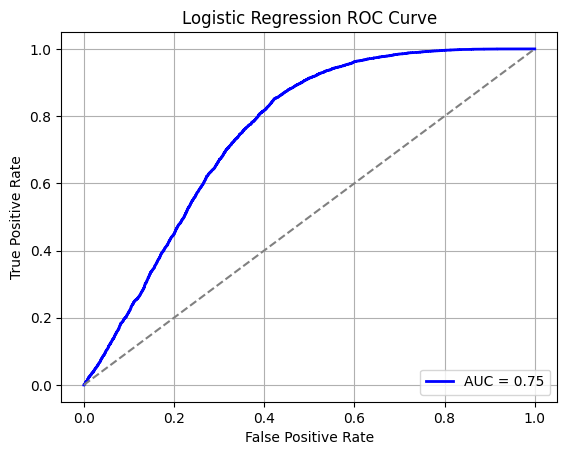

In [10]:
# Logistic Regression ROC Curve
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'AUC = {roc_auc_lr:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Logistic Regression ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [13]:
# Logistic Regression Predictions
y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)

predictions = pd.DataFrame({
    "CreditScore": X_test["CreditScore"],
    "AnnualIncome": X_test["AnnualIncome"],
    "LoanAmount": X_test["LoanAmount"],
    "LoanDuration": X_test["LoanDuration"],
    "Age": X_test["Age"],
    "DebtToIncomeRatio": X_test["DebtToIncomeRatio"],
    "rawPrediction": y_pred_proba[:, 1],
    "prediction": y_pred,
    "probability": list(map(list, y_pred_proba))
})

print(predictions.head(10).to_string(index=False))


 CreditScore  AnnualIncome  LoanAmount  LoanDuration  Age  DebtToIncomeRatio  rawPrediction  prediction                               probability
         650         68496       18657             1   41           0.514076       0.400452           0  [0.5995479870631812, 0.4004520129368187]
         674         49962       21622             4   51           0.603126       0.376854           0  [0.6231462418477602, 0.3768537581522397]
         526         51324       18208            19   48           0.703683       0.286743           0  [0.7132565856761991, 0.2867434143238009]
         357         64356       18061             7   68           0.196757       0.088891           0 [0.9111089282430296, 0.08889107175697046]
         488         72710       19231            29   40           0.943449       0.220198           0 [0.7798019013772659, 0.22019809862273415]
         534         45955       21749            20   36           0.356038       0.382209           0  [0.6177906865129591

## Random Forest

In [18]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average="binary", zero_division=0)
recall_rf = recall_score(y_test, y_pred_rf, average="binary", zero_division=0)
f1_rf = f1_score(y_test, y_pred_rf, average="binary")
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print({
    "Model": "Random Forest",
    "Accuracy": accuracy_rf,
    "Precision": precision_rf,
    "Recall": recall_rf,
    "F1 Score": f1_rf,
    "AUC": auc_rf,
})


{'Model': 'Random Forest', 'Accuracy': 0.7411, 'Precision': 0.6010459138450629, 'Recall': 0.9092249932957898, 'F1 Score': 0.7236926360725721, 'AUC': 0.8026109451112592}


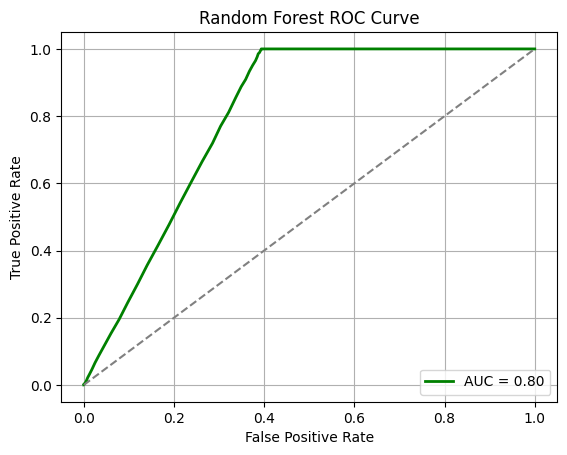

In [19]:
# Random Forest ROC Curve
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Random Forest ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [20]:
# Random Forest Predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)

predictions = pd.DataFrame({
    "CreditScore": X_test["CreditScore"],
    "AnnualIncome": X_test["AnnualIncome"],
    "LoanAmount": X_test["LoanAmount"],
    "LoanDuration": X_test["LoanDuration"],
    "Age": X_test["Age"],
    "DebtToIncomeRatio": X_test["DebtToIncomeRatio"],
    "rawPrediction": y_pred_proba[:, 1],
    "prediction": y_pred,
    "probability": list(map(list, y_pred_proba))
})

print(predictions.head(10).to_string(index=False))


 CreditScore  AnnualIncome  LoanAmount  LoanDuration  Age  DebtToIncomeRatio  rawPrediction  prediction  probability
         650         68496       18657             1   41           0.514076           0.71           1 [0.29, 0.71]
         674         49962       21622             4   51           0.603126           0.59           1 [0.41, 0.59]
         526         51324       18208            19   48           0.703683           0.60           1   [0.4, 0.6]
         357         64356       18061             7   68           0.196757           0.00           0   [1.0, 0.0]
         488         72710       19231            29   40           0.943449           0.00           0   [1.0, 0.0]
         534         45955       21749            20   36           0.356038           0.67           1 [0.33, 0.67]
         845         77680       21896            29   50           0.468295           0.64           1 [0.36, 0.64]
         684         61963       25369            29   49       

## Naivebayes

In [21]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)
y_pred_proba_nb = nb_model.predict_proba(X_test)[:, 1]

# Evaluate metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average="binary", zero_division=0)
recall_nb = recall_score(y_test, y_pred_nb, average="binary", zero_division=0)
f1_nb = f1_score(y_test, y_pred_nb, average="binary")
auc_nb = roc_auc_score(y_test, y_pred_proba_nb)

print({
    "Model": "Naive Bayes",
    "Accuracy": accuracy_nb,
    "Precision": precision_nb,
    "Recall": recall_nb,
    "F1 Score": f1_nb,
    "AUC": auc_nb,
})


{'Model': 'Naive Bayes', 'Accuracy': 0.70575, 'Precision': 0.5958094774028505, 'Recall': 0.6558058460713327, 'F1 Score': 0.6243696942618242, 'AUC': 0.7984811793970542}


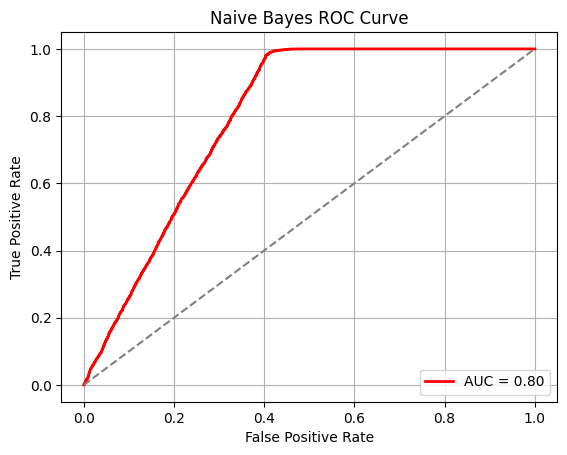

In [22]:
# Naive Bayes ROC Curve
y_pred_proba_nb = nb_model.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_proba_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure()
plt.plot(fpr_nb, tpr_nb, color='red', lw=2, label=f'AUC = {roc_auc_nb:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Naive Bayes ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [23]:
# Naive Bayes Predictions
y_pred = nb_model.predict(X_test)
y_pred_proba = nb_model.predict_proba(X_test)

predictions = pd.DataFrame({
    "CreditScore": X_test["CreditScore"],
    "AnnualIncome": X_test["AnnualIncome"],
    "LoanAmount": X_test["LoanAmount"],
    "LoanDuration": X_test["LoanDuration"],
    "Age": X_test["Age"],
    "DebtToIncomeRatio": X_test["DebtToIncomeRatio"],
    "rawPrediction": y_pred_proba[:, 1],
    "prediction": y_pred,
    "probability": list(map(list, y_pred_proba))
})

print(predictions.head(10).to_string(index=False))


 CreditScore  AnnualIncome  LoanAmount  LoanDuration  Age  DebtToIncomeRatio  rawPrediction  prediction                                probability
         650         68496       18657             1   41           0.514076       0.594932           1   [0.4050683560525364, 0.5949316439474588]
         674         49962       21622             4   51           0.603126       0.598854           1   [0.4011461714230124, 0.5988538285769812]
         526         51324       18208            19   48           0.703683       0.232225           0  [0.7677746319854181, 0.23222536801458715]
         357         64356       18061             7   68           0.196757       0.012301           0 [0.9876986139598519, 0.012301386040144248]
         488         72710       19231            29   40           0.943449       0.158484           0  [0.8415159943481609, 0.15848400565184215]
         534         45955       21749            20   36           0.356038       0.243370           0    [0.75662958

## GradientBoost

In [24]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]

# Evaluate metrics
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average="binary", zero_division=0)
recall_gb = recall_score(y_test, y_pred_gb, average="binary", zero_division=0)
f1_gb = f1_score(y_test, y_pred_gb, average="binary")
auc_gb = roc_auc_score(y_test, y_pred_proba_gb)

print({
    "Model": "Gradient Boosting",
    "Accuracy": accuracy_gb,
    "Precision": precision_gb,
    "Recall": recall_gb,
    "F1 Score": f1_gb,
    "AUC": auc_gb,
})


{'Model': 'Gradient Boosting', 'Accuracy': 0.75335, 'Precision': 0.6021853500607042, 'Recall': 0.997586484312148, 'F1 Score': 0.7510220562257105, 'AUC': 0.8016877878689095}


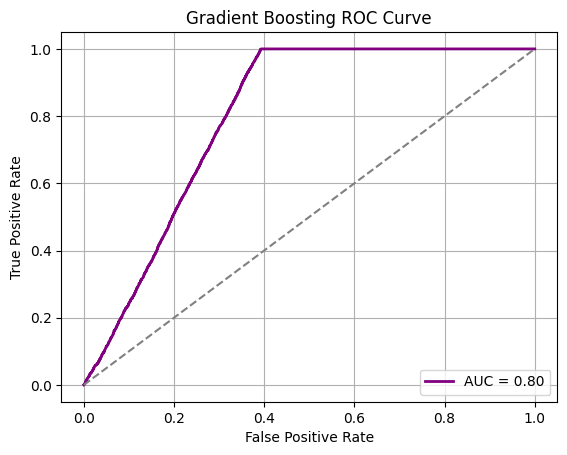

In [25]:
# Gradient Boosting ROC Curve
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.figure()
plt.plot(fpr_gb, tpr_gb, color='purple', lw=2, label=f'AUC = {roc_auc_gb:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Gradient Boosting ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [26]:
# Gradient Boosting Predictions
y_pred = gb_model.predict(X_test)
y_pred_proba = gb_model.predict_proba(X_test)

predictions = pd.DataFrame({
    "CreditScore": X_test["CreditScore"],
    "AnnualIncome": X_test["AnnualIncome"],
    "LoanAmount": X_test["LoanAmount"],
    "LoanDuration": X_test["LoanDuration"],
    "Age": X_test["Age"],
    "DebtToIncomeRatio": X_test["DebtToIncomeRatio"],
    "rawPrediction": y_pred_proba[:, 1],
    "prediction": y_pred,
    "probability": list(map(list, y_pred_proba))
})

print(predictions.head(10).to_string(index=False))


 CreditScore  AnnualIncome  LoanAmount  LoanDuration  Age  DebtToIncomeRatio  rawPrediction  prediction                                 probability
         650         68496       18657             1   41           0.514076       0.609279           1    [0.3907213551074272, 0.6092786448925728]
         674         49962       21622             4   51           0.603126       0.595247           1   [0.40475310003795584, 0.5952468999620442]
         526         51324       18208            19   48           0.703683       0.595765           1   [0.40423481390978455, 0.5957651860902154]
         357         64356       18061             7   68           0.196757       0.002329           0  [0.9976709211136188, 0.002329078886381266]
         488         72710       19231            29   40           0.943449       0.002303           0 [0.9976966994746805, 0.0023033005253194137]
         534         45955       21749            20   36           0.356038       0.594765           1    [0.40